# split the document space into sectors
# words will be grouped by sector, and matched with the words in corresponding sector (related by position) of another document
# the matching result will be summarized as a sector similarity, the overral similarity will be the similarity of the two document

In [16]:
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
from shapely.geometry import *
from shapely.ops import unary_union, split
from descartes import PolygonPatch
from figures import SIZE, BLUE, GRAY, set_limits

In [11]:
import math
import numpy as np

In [12]:
xm, ym = 60, 100
x0, y0 = 40, 25
n_layers = 20
n_pie = 24

max_dist_x = abs(xm/2-x0)+xm/2
max_dist_y = abs(ym/2-y0)+ym/2
max_dist = math.sqrt(max_dist_x**2+max_dist_y**2)

#equal ring gap
#rs = np.linspace(0, max_dist, n_layers+1)[::-1]

#log scale up ring gap
rs = np.geomspace(1, max_dist, n_layers+1)[::-1]

In [13]:
angls = np.arange(0, np.pi, np.pi*2/n_pie)

dy = max_dist * np.sin(angls) * 1.05
dx = max_dist * np.cos(angls) * 1.05 #extend the line a bit further to make sure it intersect with the outer ring of the circle panel

In [14]:
results = []
bg = None
sp_lines = [LineString([(x0+xx, y0+yy), (x0-xx, y0-yy)]) for xx, yy in zip(dx, dy)]
for r in rs:
    inner = Point(x0, y0).buffer(r)
    if bg == None:
        bg = inner
    else:
        ring = bg.difference(inner)
        bg = inner
        tmp_results = [ring]
        for sp_line in sp_lines:
            tmp = []
            for p in tmp_results:
                tmp += split(p, sp_line)
            tmp_results = tmp
        results += tmp_results

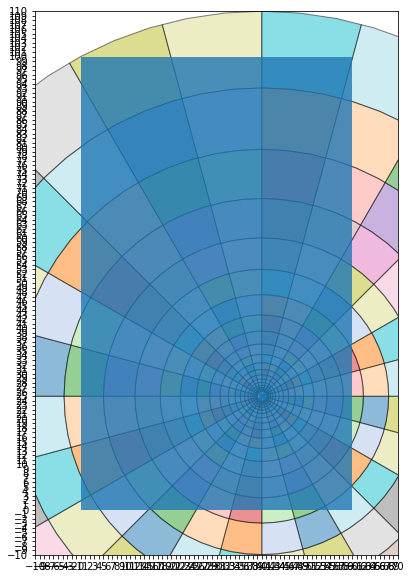

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for r in results:
    patches.append(PolygonPatch(r))


cmap = cm.get_cmap('tab20')
p = PatchCollection(patches, cmap=cmap, ec='black', alpha=0.5)
p.set_array(np.arange(0, len(cmap.colors)))
ax.add_collection(p)

patches = [Rectangle((0, 0), width=xm, height=ym)]
p = PatchCollection(patches, alpha=0.8)
ax.add_collection(p)


ax.scatter([x0], [y0], s=50, marker='X')
ax_margin = 10
set_limits(ax, 0-ax_margin, xm+ax_margin, 0-ax_margin, ym+ax_margin)

plt.show()